In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def derivative_sigmoid(x):
    return x * (1 - x)

In [4]:
data = pd.read_csv("Breast_Cancer.csv")
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [5]:
label_encoder = LabelEncoder()
for column in data.select_dtypes(include='object').columns:
    data[column] = label_encoder.fit_transform(data[column])

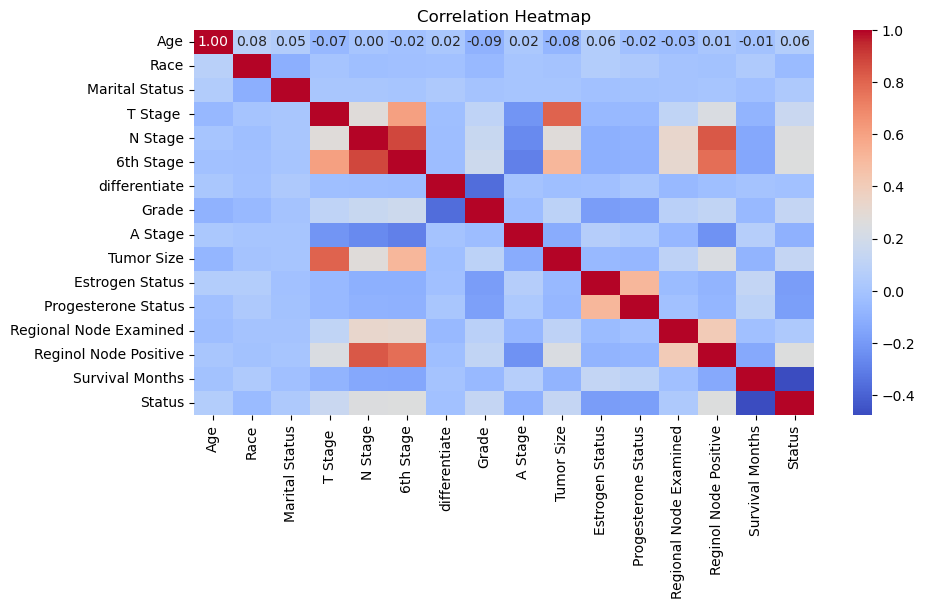

In [14]:
plt.figure(figsize=(10 ,5)) 
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [15]:
data['Status'].value_counts()

Status
0    3408
1     616
Name: count, dtype: int64

In [16]:
X = data.drop(['Status'], axis=1)
y = data['Status']

In [17]:
oversampler = SMOTE(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [18]:
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=92)

In [21]:
input_neurons = X_train.shape[1]
hidden_neurons = 5  
output_neurons = 1

In [22]:
wh = np.random.uniform(size=(input_neurons, hidden_neurons))
bh = np.random.uniform(size=(1, hidden_neurons))
wo = np.random.uniform(size=(hidden_neurons, output_neurons))
bo = np.random.uniform(size=(1, output_neurons))

In [23]:
epoch = 20000
lr = 0.001

Training the model

In [24]:
for i in range(epoch):
    # Forward pass
    hidden_input = np.dot(X_train, wh) + bh
    hidden_activation = sigmoid(hidden_input)
    output_layer = np.dot(hidden_activation, wo) + bo
    output = sigmoid(output_layer)

    # Backward pass
    E = y_train.values.reshape(-1, 1) - output
    slope_output = derivative_sigmoid(output)
    slope_hidden = derivative_sigmoid(hidden_activation)
    d_output = E * slope_output
    error_hidden = d_output.dot(wo.T)
    d_hidden = error_hidden * slope_hidden

    # Update weights and biases
    wo += hidden_activation.T.dot(d_output) * lr
    bo += np.sum(d_output, axis=0, keepdims=True) * lr
    wh += X_train.T.dot(d_hidden) * lr
    bh += np.sum(d_hidden, axis=0, keepdims=True) * lr

Testing the Model

In [25]:
# Testing the model
hidden_input_test = np.dot(X_test, wh) + bh
hidden_activation_test = sigmoid(hidden_input_test)
output_layer_test = np.dot(hidden_activation_test, wo) + bo
output_test = sigmoid(output_layer_test)

Predictions 

In [26]:
threshold = 0.5
predictions = (output_test >= threshold).astype(int)

In [27]:
predictions.shape

(1364, 1)

Model Metrics 

In [28]:
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[551 120]
 [126 567]]


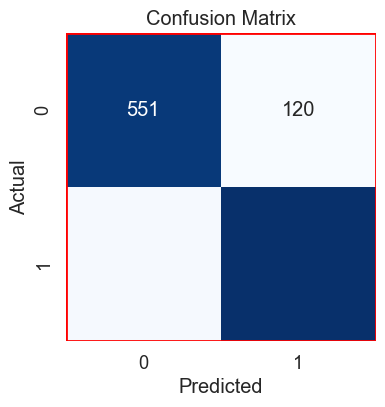

In [29]:
sns.set(font_scale=1.2)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.gca().add_patch(plt.Rectangle((0, 0), conf_matrix.shape[1], conf_matrix.shape[0], fill=False, edgecolor='red', lw=2))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Classification Report 

In [30]:
class_report = classification_report(y_test, predictions, zero_division=1)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       671
           1       0.83      0.82      0.82       693

    accuracy                           0.82      1364
   macro avg       0.82      0.82      0.82      1364
weighted avg       0.82      0.82      0.82      1364



Accuracy of 85%